In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,
                    noise=3.0)

In [8]:
X[:,0][:5]

array([ 0.48205623, -1.55272439, -0.29134855,  0.87077781,  1.25510569])

In [5]:
y[:5]

array([ 42.29039043,  59.44118878, -17.63355476,  31.04677666,
         8.37771564])

<AxesSubplot: >

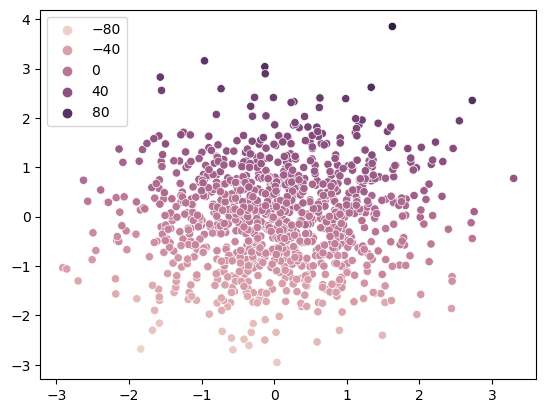

In [9]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
y_pred = svr.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(2.1517587046065882, 7.635067952033213, 2.7631626720179203, 0.9896282302429033)

# hyperparameter tuning

In [22]:
parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3],
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_svr = GridSearchCV(SVR(),param_grid=parameter,
                        cv=5,refit=True,verbose=3)

In [25]:
grid_svr.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [26]:
grid_svr.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [27]:
grid_svr.best_score_

0.9877137407970349

In [29]:
y_pred = grid_svr.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(2.1458107918006557,
 7.6595315869662866,
 2.7675858770716197,
 0.9895949979009593)